# Análisis Exploratorio de Datos: Siniestros viales en la Ciudad de Buenos Aires (2015-2018). Parte I (Python)

En esta ocasión, se presenta un análisis exploratorio del dataset de "víctimas de siniestros viales" de la Ciudad de Buenos Aires. Los datos fueron descargados de [data.buenosaires.gob.ar](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales). Contiene información sobre las víctimas de siniestros viales ocurridos en la Ciudad desde el año 2015 hasta 2018. Los datos incluyen fecha y ubicación del hecho y tipo de transporte involucrado. Además se especifica el género y edad (en años) de las víctimas y el tipo de lesión sufrida.

Podés ver [acá](https://github.com/mnrodriguez28/data-analysis-portfolio/blob/main/proyectos/eda-siniestros-viales/eda-siniestros-ii.md) la *Parte II: Víctimas de siniestros viales. Visualización de datos geográficos*.

### Importando librerías y datos

Primero, importamos las librerías de Python para análisis y visualizacion de los datos: Pandas, Matplotlib y Seaborn. Luego, importamos los datos con la función `read_csv()`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns 
sns.set_theme(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("victimas-siniestros-2015-2018.csv")

### Data Overview

En esta sección, revisamos el dataset para entender los datos que tenemos. 

In [3]:
df.head(5)

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion


In [4]:
df.shape

(33234, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   causa                         33234 non-null  object 
 1   rol                           32899 non-null  object 
 2   tipo                          32134 non-null  object 
 3   sexo                          33037 non-null  object 
 4   edad                          32675 non-null  float64
 5   mes                           33197 non-null  float64
 6   periodo                       33234 non-null  int64  
 7   fecha                         33173 non-null  object 
 8   hora                          33217 non-null  object 
 9   lugar_hecho                   29518 non-null  object 
 10  direccion_normalizada         32469 non-null  object 
 11  tipo_calle                    33234 non-null  object 
 12  direccion_normalizada_arcgis  32462 non-null  object 
 13  c

In [6]:
df.isna().sum()

causa                               0
rol                               335
tipo                             1100
sexo                              197
edad                              559
mes                                37
periodo                             0
fecha                              61
hora                               17
lugar_hecho                      3716
direccion_normalizada             765
tipo_calle                          0
direccion_normalizada_arcgis      772
calle1                            765
altura                          26123
calle2                           8247
codigo_calle                     9290
codigo_cruce                    12525
geocodificacion                  1095
semestre                            0
x                                1095
y                                1095
geom                             1095
cantidad_victimas                   0
comuna                           1098
geom_3857                        1095
tipo_colisio

El dataset contiene 33234 filas y 29 columnas. La mayoría de las columnas presentan valores nulos, y el tipo de dato en algunos casos (como en `fecha`, `hora`, `edad`, `periodo`) no es el indicado. Más adelante corregiremos los tipo de datos.

### Análisis y visualización de datos

**1. ¿Cuál es la edad promedio de las víctimas?**

In [7]:
edad_mean = df.edad.mean()
print(round(edad_mean, 1))

36.4


**2. ¿Cuál es promedio de víctimas en los siniestros viales?**

Dado que no hay un ID que relacione entre sí a las víctimas de un mismo siniestro vial, creamos uno utilizando el nombre de la calle, fecha y hora. Esto nos va a permitir calcular el promedio sin contar un mismo valor repetidamente (es decir, el valor de `cantidad_victimas` por cada víctima de un mismo accidente).

In [8]:
df_vict_mean = df.groupby(["lugar_hecho", "fecha", "hora"]).count().reset_index()[["lugar_hecho", "fecha", "hora", "cantidad_victimas"]]
df_vict_mean.head(15)

,lugar_hecho,fecha,hora,cantidad_victimas
0,paysandu y tres arroyos,3/26/2015,14:20:00,1
1,11 de septiembre y vedia,1/15/2015,9:36:00,1
2,acceso colectora gral paz,11/18/2015,23:42:00,1
3,"alcorta, amancio av. 3780",08-11-17,12:30:00,1
4,angel j carranza 1036,07-05-17,12:45:00,1
5,arribeñoz e ibera,12-09-15,21:56:00,1
6,av garay y matheu,06-02-15,19:00:00,1
7,av san juan y colombres,7/19/2015,4:04:00,1
8,av. cabildo y manuela pedraza,01-06-15,20:07:00,1
9,av. cramer y nuñez,1/13/2015,10:00:00,3


In [9]:
victimas_mean = df_vict_mean["cantidad_victimas"].mean()
print(round(victimas_mean, 1))

1.1


**3. ¿Cuántos casos hubo por cada tipo de lesión sufrida?**


In [10]:
df.causa.value_counts()

lesiones     32795
homicidio      439
Name: causa, dtype: int64

**4. ¿En qué tipo de vía se produjeron más accidentes?**

In [11]:
df.tipo_calle.value_counts()

avenida      21395
calle        11687
autopista      152
Name: tipo_calle, dtype: int64

**5. ¿Cuántos siniestros hubo por comuna?**

In [12]:
df.comuna.value_counts()

1.0     4468
3.0     3032
15.0    2521
14.0    2383
4.0     2382
9.0     2367
7.0     2039
11.0    2031
13.0    1846
12.0    1784
10.0    1681
5.0     1665
8.0     1402
6.0     1272
2.0     1263
Name: comuna, dtype: int64

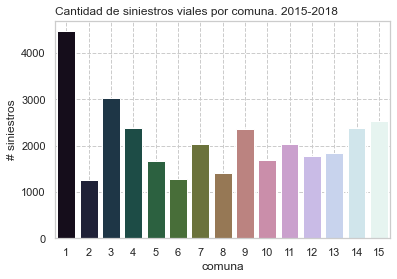

In [13]:
sns.countplot(x="comuna", data=df, palette = "cubehelix")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: (int(x)+1)))
plt.ylabel("# siniestros")
plt.title("Cantidad de siniestros viales por comuna. 2015-2018", loc = "left")
plt.grid(True, ls = "--")

**6. ¿Cuáles fueron los accidentes más frecuentes?**

In [14]:
df.tipo_colision1.value_counts()

motovehiculo - vehiculo             8400
vehiculo - vehiculo                 6384
peaton - vehiculo                   4464
multiple                            4285
vehiculo - motovehiculo             2995
motovehiculo - peaton               1429
bicicleta - vehiculo                1384
vehiculo - peaton                   1191
motovehiculo - motovehiculo          622
vehiculo - bicicleta                 394
bicicleta - motovehiculo             193
bicicleta - peaton                   116
bicicleta - bicicleta                 19
peaton - peaton                       10
traccion a sangre - vehiculo           2
motovehiculo - traccion a sangre       1
motovehiculo - tren                    1
subte - vehiculo                       1
Name: tipo_colision1, dtype: int64

Como algunos tipos de colisión se repiten en distinto orden (por ejemplo, `motovehiculo - vehiculo` y `vehiculo - motovehiculo`), se reemplazaron estas etiquetas por uno de estos nombres con el fin de agruparlas en el conteo de siniestros.

In [15]:
df_colision = df.copy()
df_colision["tipo_colision1"] = df_colision["tipo_colision1"].replace(["vehiculo - motovehiculo"], "motovehiculo - vehiculo")
df_colision["tipo_colision1"] = df_colision["tipo_colision1"].replace(["vehiculo - peaton"], "peaton - vehiculo")
df_colision["tipo_colision1"] = df_colision["tipo_colision1"].replace(["vehiculo - bicicleta"], "bicicleta - vehiculo")

df_colision.tipo_colision1.value_counts()

motovehiculo - vehiculo             11395
vehiculo - vehiculo                  6384
peaton - vehiculo                    5655
multiple                             4285
bicicleta - vehiculo                 1778
motovehiculo - peaton                1429
motovehiculo - motovehiculo           622
bicicleta - motovehiculo              193
bicicleta - peaton                    116
bicicleta - bicicleta                  19
peaton - peaton                        10
traccion a sangre - vehiculo            2
subte - vehiculo                        1
motovehiculo - tren                     1
motovehiculo - traccion a sangre        1
Name: tipo_colision1, dtype: int64

Ahora vemos que ninguna etiqueta se repite y, por ejemplo, `motovehiculo - vehiculo` contiene también el conteo de `vehiculo - motovehiculo`.

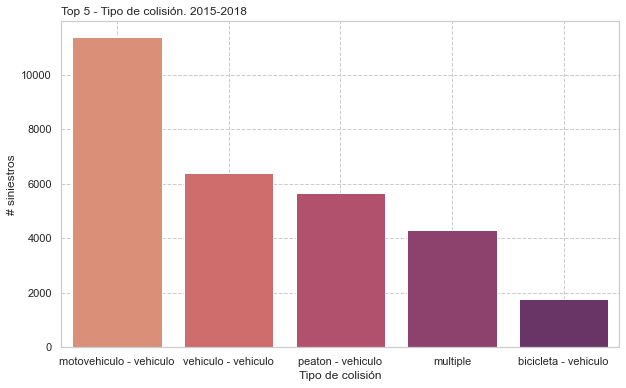

In [16]:
df_top5 = df_colision.tipo_colision1.value_counts().head().reset_index()
df_top5.rename(columns = {"index":"tipo_colision", "tipo_colision1":"count"}, inplace = True)

plt.figure(figsize=(10, 6))
sns.barplot(x="tipo_colision" ,y="count", data=df_top5, palette = "flare")
plt.xlabel("Tipo de colisión")
plt.ylabel("# siniestros")
plt.title("Top 5 - Tipo de colisión. 2015-2018", loc = "left")
plt.grid(True, ls = "--")

**7. ¿Cuántos siniestros hubo por año?**

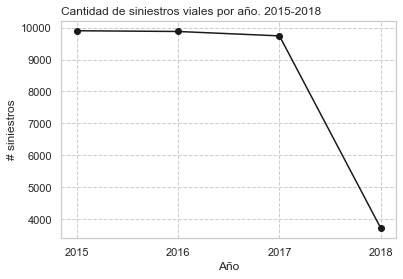

In [17]:
df_año = df.copy()
df_año = df_año.groupby(["periodo"]).count().reset_index()
df_año["año"] = df_año["periodo"].astype(str)

plt.plot(df_año["año"], df_año["causa"], "o-k")
plt.xlabel("Año")
plt.ylabel("# siniestros")
plt.title("Cantidad de siniestros viales por año. 2015-2018", loc = "left")
plt.grid(True, ls = "--")

En los tres primeros años, la cantidad de accidentes se mantuvo estable (alrededor de 10000 por año) pero en el 2018 se observa un descenso, llegando a menos de 4000 casos. Indagando más sobre los datos, nos damos cuenta que este descenso se debe a que sólo se registraron datos durante primer semestre para el año 2018. Por esto, hacemos otro lineplot pero esta vez incluyendo la variable `semestre`.

In [18]:
df_sem = df.copy()
df_sem = df_sem.groupby(["periodo", "semestre"]).count().reset_index()
df_sem["año"] = df_sem["periodo"].astype(str)
df_sem = df_sem.pivot(index = "año", columns = "semestre", values = "causa").reset_index()
df_sem.rename({1:"sem_1", 2:"sem_2"}, axis = 1, inplace = True)

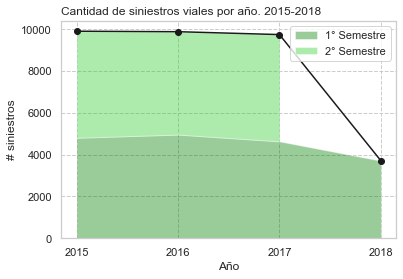

In [19]:
plt.plot(df_año["año"], df_año["causa"], "o-k")
plt.stackplot(df_sem["año"], df_sem["sem_1"], df_sem["sem_2"], labels = ["1° Semestre", "2° Semestre"], alpha = 0.4, colors = ["green", "limegreen"])
plt.legend(loc = "upper right")
plt.xlabel("Año")
plt.ylabel("# siniestros")
plt.title("Cantidad de siniestros viales por año. 2015-2018", loc = "left")
plt.grid(True, ls = "--")

Con este segundo gráfico vemos que hubo un descenso, aunque pequeño, en el año 2018 durante el primer semestre, en comparación con los tres primeros años.

**8. ¿En qué horario se produjeron más accidentes?**

In [20]:
df_tiempo = df.copy()
df_tiempo["hora"] = pd.to_datetime(df_tiempo["hora"], format = "%H:%M:%S").dt.hour
df_tiempo = df_tiempo.groupby(["hora", "periodo"]).count().reset_index()[["hora", "causa", "periodo"]]

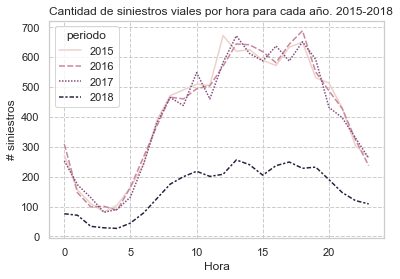

In [21]:
sns.lineplot(x="hora", y="causa", hue="periodo", style="periodo", data=df_tiempo)
plt.xlabel("Hora")
plt.ylabel("# siniestros")
plt.title("Cantidad de siniestros viales por hora para cada año. 2015-2018", loc = "left")
plt.grid(True, ls = "--")

En general, entre las 15:00 y las 18:00 hs., aproximadamente, fue el horario en el que se produjeron más accidentes de tránsito.

**9. ¿Cuál es la hora promedio en la que se produjeron más accidentes? ¿Y cuál es en la que se produjeron menos?**

In [22]:
df_hora = df.copy()
df_hora["hora"] = pd.to_datetime(df_hora["hora"], format = "%H:%M:%S").dt.hour
df_hora = df_hora.groupby(["hora"]).count().reset_index()[["hora", "causa"]]

In [23]:
max_hora = df_hora["causa"].max()
print(df_hora[df_hora["causa"] == max_hora])

    hora  causa
18  18.0   2217


In [24]:
min_hora = df_hora["causa"].min()
print(df_hora[df_hora["causa"] == min_hora])

   hora  causa
3   3.0    293


La hora promedio en la que se produjeron más siniestros viales fue a las 18:00 hs., mientras que a las 03:00 hs. se produjeron menos accidentes.